# Automatic differentation of graphs in TensorFlow

The nodes of the computational graphs defined by variables, placeholders and operations can be used to compute analytical gradients from any node to any node. This is one of the core features of TensorFlow and is mainly used to optimize variables respective to a metric such as the loss function of a neural network training.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/home/stefan/py2_virtualenv/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Define a simple graph

As a simple example, we define the function `sin(x)` as graph and in the following we want to compute the derivatives of this function using the automatic differentation of TensorFlow. However, you can do this with arbitrarily complex graphs!

In [2]:
x = tf.placeholder(tf.float64)
y = tf.sin(x)

## Compute the gradients

Because every node has a defined derivative, any gradient between nodes of the graph can be computed using the chain rule of derivatives. In the following, we define the derivatives of `sin(x)`.

In [3]:
d1y = tf.gradients(y, x)[0]
d2y = tf.gradients(d1y, x)[0]
d3y = tf.gradients(d2y, x)[0]

## Compute the response

Let us compute the results for the derivatives of `sin(x)`.

In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
inputs = np.linspace(0, 2*np.pi, 1000)

## Visualize the result

As shown below, TensorFlow returns the expected derivatives of the function `sin(x)`.

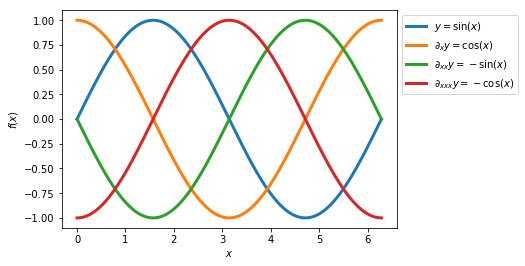

In [5]:
plt.plot(inputs, sess.run(y, feed_dict={x: inputs}), lw=3, label="$y=\sin(x)$")
plt.plot(inputs, sess.run(d1y, feed_dict={x: inputs}), lw=3, label="$\partial_x y=\cos(x)$")
plt.plot(inputs, sess.run(d2y, feed_dict={x: inputs}), lw=3, label="$\partial_{xx} y=-\sin(x)$")
plt.plot(inputs, sess.run(d3y, feed_dict={x: inputs}), lw=3, label="$\partial_{xxx} y=-\cos(x)$")
plt.xlabel("$x$"), plt.ylabel("$f(x)$"), plt.legend(bbox_to_anchor=(1.0, 1.0));